# Algoritmos condicionalmente estables.

**Objetivo general.**
- Entender e implementar un algoritmo para resolver una ecuación diferencial ordinaria.
- Entender qué es lo que se requiere para que un algoritmo sea estable.

In [3]:
import sympy
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

import macti.visual as mvis

## Ecuación diferencial ordinaria.

La siguiente Ecuación Diferencial Ordinaria (ODE, por sus siglas en inglés)
$$
\frac{d y(t)}{dt} = -a y(t), \;\; y(0) = 1, \;\; a > 0, \;\; \forall t \tag{1}
$$
tiene solución analítica: $y(t) = e^{-at}$. 

---
La ecuación $(1)$ expresa el [decaimiento exponencial](https://es.wikipedia.org/wiki/Decaimiento_exponencial) de una cantidad representada por $y(t)$. Esta cantidad disminuye a una tasa proporcional con respecto a su valor actual. El valor $a$ es una tasa positiva llamada constante de decaimiento exponencial.

---

Veamos cómo se ve esta solución para diferentes valores de $a$:

In [8]:
def exacta(a, t):
    """
    Solución exacta: y(t) = exp(-a*t)
    
    Parameters
    ----------
    a: float
    Constante de decaimiento exponencial.
    
    t: ndarray
    Arreglo con los puntos donde se evalúa la solución.
    
    Returns
    -------
    Valores calculados de la solución exacta.
    """
    return np.exp(-a * t)

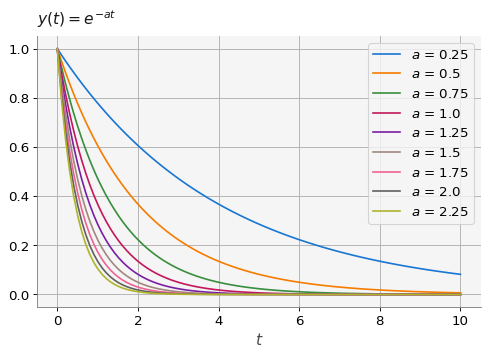

In [9]:
vis = mvis.Plotter(1,1,[dict(title = "$y(t) = e^{-at}$", xlabel='$t$')])
    
t = np.linspace(0,10,100) # Nos limitamos a valores positivos

for i in range(1,10):
    a = i * 0.25
    vis.plot(1, t, exacta(a, t), label='$a$ = {}'.format(a))

vis.grid()
vis.legend()
plt.show()

## Aproximación de la solución.

Sea $y(t)$ la solución exacta de la ecuación $(1)$, entonces: 
* Definimos $y_n \approx y(t_n)$ como la solución numérica aproximada en $t_n = n \delta t$ para $n=0,1,2,\dots, N$ y $\delta t$ un paso de tiempo.

* Aproximamos la derivada de la ecuación $(1)$ como sigue:
$$
\frac{y_{n+1}-y_n}{\delta t} = -a y_n, \,\,\,\,\, y_0 = 1
$$

* Despejamos $y_{n+1}$ para obtener la relación de recurrencia:
$$
y_{n+1} = (1 - a \delta t ) y_n \quad \text{ para } n=0,1,2,\dots, N
$$

Entonces, un algoritmo numérico para aproximar la solución de la ecuación $(1)$ es el siguiente:

1. Condición inicial:
$$y_0 = \alpha$$

2. Para $n=0,1,2, \dots, N$, evaluar:
$$
y_{n+1} = (1 - a \delta t ) y_n
$$

In [10]:
# Parámetro físicos del problema
a = 1.0      # Constante de decaimiento exponencial
t_max = 10.0 # Tiempo máximo de la solución

# Parámetros numéricos
dt = 0.1
N = int(t_max/dt)

# Arreglo para el cálculo de la solución.
tn = np.arange(0, t_max, dt)

# Solución exacta
y = exacta(a, tn)

# Arreglo para la solución numérica
yn = np.zeros(N)

# Arreglo para almacenar el error absoluto
er = np.zeros(N)

# Condición inicial.
yn[0] = 1.0

# Algoritmo numérico
for i in range(1,N):
    yn[i] = (1 - a * dt) * yn[i-1]
    er[i] = np.abs(y[i] - yn[i])

_ = [print('y[{0:>2}] = {1:>0.14f} yn[{0:>2}] = {2:>0.14f} er[{0:>2}] = {3:>0.14f}'.format(i,y[i],yn[i],er[i])) for i in range(N)]

y[ 0] = 1.00000000000000 yn[ 0] = 1.00000000000000 er[ 0] = 0.00000000000000
y[ 1] = 0.90483741803596 yn[ 1] = 0.90000000000000 er[ 1] = 0.00483741803596
y[ 2] = 0.81873075307798 yn[ 2] = 0.81000000000000 er[ 2] = 0.00873075307798
y[ 3] = 0.74081822068172 yn[ 3] = 0.72900000000000 er[ 3] = 0.01181822068172
y[ 4] = 0.67032004603564 yn[ 4] = 0.65610000000000 er[ 4] = 0.01422004603564
y[ 5] = 0.60653065971263 yn[ 5] = 0.59049000000000 er[ 5] = 0.01604065971263
y[ 6] = 0.54881163609403 yn[ 6] = 0.53144100000000 er[ 6] = 0.01737063609403
y[ 7] = 0.49658530379141 yn[ 7] = 0.47829690000000 er[ 7] = 0.01828840379141
y[ 8] = 0.44932896411722 yn[ 8] = 0.43046721000000 er[ 8] = 0.01886175411722
y[ 9] = 0.40656965974060 yn[ 9] = 0.38742048900000 er[ 9] = 0.01914917074060
y[10] = 0.36787944117144 yn[10] = 0.34867844010000 er[10] = 0.01920100107144
y[11] = 0.33287108369808 yn[11] = 0.31381059609000 er[11] = 0.01906048760808
y[12] = 0.30119421191220 yn[12] = 0.28242953648100 er[12] = 0.01876467543120

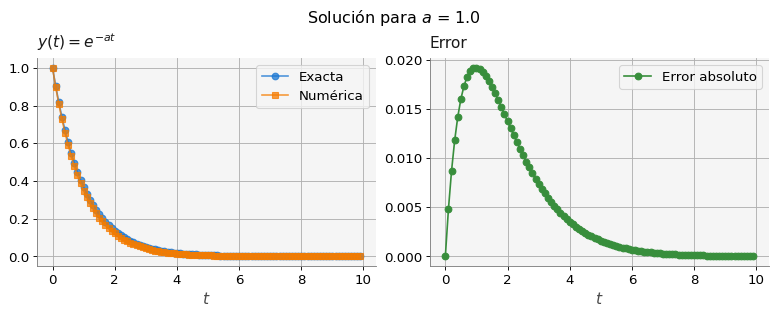

In [11]:
vis = mvis.Plotter(1,2,[dict(title = "$y(t) = e^{-at}$", xlabel='$t$'),
                       dict(title="Error", xlabel='$t$')], 
                   dict(figsize=(10,4)))
    
vis.plot(1, tn, y,  marker='o', alpha=0.75, label='Exacta')
vis.plot(1, tn, yn, marker='s', alpha=0.75, label='Numérica')
vis.plot(2, tn, er, marker='o', color='C2', label='Error absoluto')

vis.figtitle('Solución para $a$ = {}'.format(a))
vis.grid()
vis.legend()
plt.show()